In [1]:
"""
Name: con_realistic_example.ipynb
Authors: Stephan Meighen-Berger
Example of the realistic simulations that can be done
"""
%load_ext autoreload
%autoreload 2

In [2]:
 # General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm
import pandas as pd
import logging

import cProfile, pstats, io
from pstats import SortKey



In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [7]:
from contagion.state_machine import ChangeStateConditionalTransition, BooleanState, DataDict

data = {
    "will_be_hospitalzed": np.asarray([True, False, False]),
    "is_new_infected": np.asarray([True, True, False])}

data = DataDict(data)
state_a = BooleanState.from_boolean("is_new_infected")
state_b = BooleanState.from_boolean("will_be_hospitalzed")

t = ChangeStateConditionalTransition("hosp", state_b, state_a)

t(data)

print(data)

{'will_be_hospitalzed': array([ True, False, False]), 'is_new_infected': array([ True,  True, False])}


In [8]:
# Module imports
from contagion import Contagion, config
from contagion.mc_sim import MC_Sim
config["average social circle"] = 10
config["population size"] = 50000
config["debug level"] = "WARN"


In [9]:
print(config)

{'debug level': 'WARN', 'log file handler': '../run/contagion.log', 'config location': '../run/config.txt', 'population size': 50000, 'simulation length': 200, 'infected': 10, 'random state': <mtrand.RandomState object at 0x000001A8600C21B0>, 'average social circle': 10, 'variance social circle': 5, 'social circle pdf': 'gauss', 'mean social circle interactions': 0.2, 'variance social circle interactions': 2, 'social circle interactions pdf': 'gauss', 'infection probability pdf': 'intensity', 'infection duration mean': 20, 'infection duration variance': 5, 'infection duration pdf': 'gauss', 'infectious duration mean': 3, 'infectious duration variance': 5, 'infectious duration pdf': 'gauss', 'incubation duration mean': 5, 'incubation duration variance': 2, 'incubation duration pdf': 'gauss', 'hospitalization probability pdf': 'beta', 'hospitalization probability mean': 0.2, 'hospitalization probability sd': 0.1, 'hospitalization duration pdf': 'gauss', 'hospitalization duration mean': 2

In [23]:
# Creating a contagion object
start = time()
contagion = Contagion()

In [24]:
 # Storing the solutions
config["random state"] = np.random.RandomState(1337)
pr = cProfile.Profile()
pr.enable()

contagion.sim()
pr.disable()

In [25]:
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
#print(s.getvalue())

pr.dump_stats("profile.prof")

In [26]:
for key in contagion.statistics:
    print(key, len(contagion.statistics[key]))

is_removed 200
is_incubation 200
is_infectious 200
is_infected 200
is_hospitalized 200
is_recovered 200
is_dead 200


In [27]:
stats = pd.DataFrame(contagion.statistics)


In [28]:
# Plotting standards
std_size = 10.
fontsize = 15.
lw=3.
h_length=1.
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

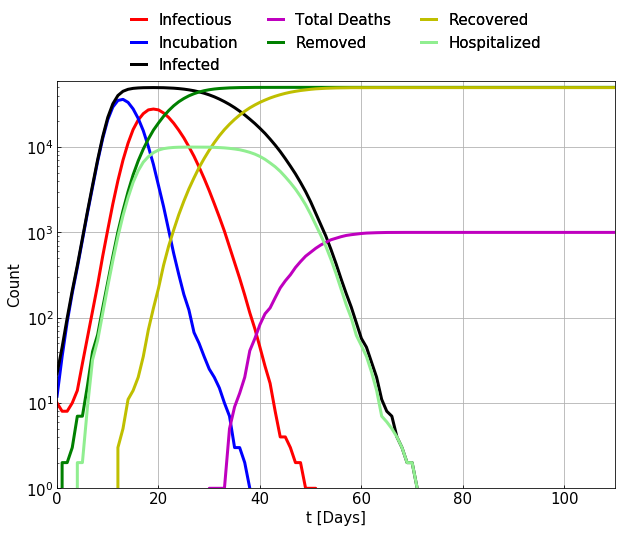

In [31]:
 # Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
ax.plot(contagion.t, stats['is_infectious'],
        lw=lw, label='Infectious', color='r')
ax.plot(contagion.t, stats['is_incubation'],
        lw=lw, label='Incubation', color='b')
ax.plot(contagion.t, stats['is_infected'],
        lw=lw, label='Infected', color="k")
ax.plot(contagion.t, stats['is_dead'],
        lw=lw, label='Total Deaths', color="m")
"""
ax.plot(contagion.t, stats['new infections'],
        lw=lw, label='New infections', color=colors[1])

ax.plot(contagion.t, stats['will be hospitalized'],
        lw=lw, label='Will Be Hospitalized', color="c")

"""
ax.plot(contagion.t, stats['is_removed'],
        lw=lw, label='Removed', color='g')
"""
ax.plot(contagion.t, stats['contacts'],
        lw=lw, label='Contacts', color='c')
"""
ax.plot(contagion.t, stats['is_recovered'],
        lw=lw, label='Recovered', color='y')
ax.plot(contagion.t, stats['is_hospitalized'],
        lw=lw, label='Hospitalized', color='lightgreen')
ax.set_xlim(0, 110)
ax.set_ylim(0., config['population size'] * 1.01)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r't [Days]', fontsize=fontsize)
ax.set_ylabel(r'Count', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.2),
                 ncol=3, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.grid(True)
plt.semilogy()
plt.ylim(1, config['population size'] * 1.2)
plt.show()
figure.tight_layout()
figure.savefig(PICS+"Contagion_Example.png", dpi=150)